##### Python Lab #6
##### Tiffany Wibisono

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%6f' % x)

import warnings
warnings.filterwarnings('ignore')

Question 1 

In [10]:
# The result prints an array with three nested arrays inside it. 

planets = np.array([['Mercury', 'Venus', 'Mars'], 
                    ['Jupiter', 'Saturn', 'Uranus'],
                    ['Pluto']])

print(planets)

[list(['Mercury', 'Venus', 'Mars']) list(['Jupiter', 'Saturn', 'Uranus'])
 list(['Pluto'])]


Question 2 

In [8]:
# The result prints two strings based on a specific information from the array 'planet'. 
# Index is used to print specific information from the the array. 

planets = np.array([['Mercury', 'Venus', 'Mars'], 
                    ['Jupiter', 'Saturn', 'Uranus'],
                    ['Pluto']])

print(f"{planets[0][1]} is the second planet from the sun.")  
print(f"{planets[2][0]} is not a planet.")

Venus is the second planet from the sun.
Pluto is not a planet.


Question 3 

In [59]:
# A variable x is created to hold an array range between 10 and 100 with an interval of 10
# Variable sub1 is created to print the fourth to the nirth number in variable x with an interval of 2
# Variable sub2 is created to print the first to the sixth number in variable x with an interval of 2
# The second result prints an array of the product sub1 and sub2
# The third result prints an array of the square root of sub2

x = np.arange(10, 101, 10)

sub1 = x[3:10:2]
sub2 = x[0:7:2]

product = sub1*sub2
print(product)

print(np.sqrt(sub2))


[ 400 1800 4000 7000]
[3.16227766 5.47722558 7.07106781 8.36660027]


Question 4 

In [12]:
# A list of classes and students are created
# A pandas Series is created out of classes and students (classes as the index), and it is saved as the 
# variable 'att'. Then, elements in the pandas Series is printed.
# A new element is added to the series (key = programming, value = 31)
# The series is printed again, but only printed elements that have value below 31. 

classes = ["Algebra I", "Intro to Business", "Creative Writing"]
students = [30, 31, 29]

att = pd.Series(students, classes)
print(att)
att["Programmming"] = 31

print("\n")

print(att[att < 31])


Algebra I            30
Intro to Business    31
Creative Writing     29
dtype: int64


Algebra I           30
Creative Writing    29
dtype: int64


Question 5 

In [5]:
# A dictionary called 'data' is created to print panda Dataframe.
# The first result prints a Dataframe based on the given data in the dictionary for the column and student names 
# for the index.
# The second result prints the same Dataframe as the first one, but this time, Claude's Test 2 grade is altered,
# and an additional row and column is added.

data = {"Test1": [92, 72, 98],
        "Test2": [85, 83, 89],
        "Test3": [83, 99, 61]}

studentGrade = pd.DataFrame(data, index=['Sean', 'Claude', 'Laura'])
print(studentGrade)

print('\n')

studentGrade.loc['Claude']['Test2'] = 81
studentGrade.loc['James'] = [72, 83, 99]
studentGrade['Test 4'] = [69, 71, 72, 83]
print(studentGrade)                         

        Test1  Test2  Test3
Sean       92     85     83
Claude     72     83     99
Laura      98     89     61


        Test1  Test2  Test3  Test 4
Sean       92     85     83      69
Claude     72     81     99      71
Laura      98     89     61      72
James      72     83     99      83


Question 6   

In [91]:
# A dictionary called 'salesDict' and a list called 'dates' are created to print panda Dataframe.
# The first result prints a Dataframe based on the data in the dictionary for the column and data in the list
# for the index.
# The second result prints a Dataframe of the three new columns of the mean, median, and standard deviation values
# for each date. The three columns shown in the first result are deleted.


salesDict = {'Samsung Galaxy S10': [769.34, 834.23, 900.12, 1021.12],
             'iPhone X': [983.11, 881.21, 1210.32, 1100.34],
             'Google Pixel 4': [1021.18, 1321.12, 832.14, 992.15]}

dates = ['01/01/2020', '01/02/2020', '01/03/2020', '01/04/2020']

sales = pd.DataFrame(salesDict, index=[dates])
print(sales)

avg = sales.mean(axis=1)
med = sales.median(axis=1)
std = sales.std(axis=1)

sales['Mean'] = avg
sales['Median'] = med
sales['St Dev'] = std

sales = sales.drop('Samsung Galaxy S10', axis=1)
sales = sales.drop('iPhone X', axis=1)
sales = sales.drop('Google Pixel 4', axis=1)

print('\n')
print(sales)

            Samsung Galaxy S10    iPhone X  Google Pixel 4
01/01/2020          769.340000  983.110000     1021.180000
01/02/2020          834.230000  881.210000     1321.120000
01/03/2020          900.120000 1210.320000      832.140000
01/04/2020         1021.120000 1100.340000      992.150000


                  Mean      Median     St Dev
01/01/2020  924.543333  983.110000 135.751196
01/02/2020 1012.186667  881.210000 268.573330
01/03/2020  980.860000  900.120000 201.604164
01/04/2020 1037.870000 1021.120000  56.006168


Question 7 (Method 1)

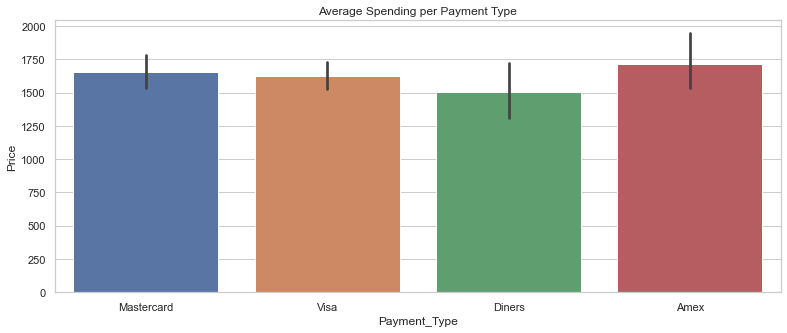

In [16]:
# The result shows a bar graph created using Seaborn library.
# The bar graph tells the relationship between the the average spending (price) and payment type. 

salesDF = pd.read_csv('DataLab/SalesJan2009.csv', sep=',')

sns.set(style='whitegrid')
plt.figure(figsize=(13,5))
plt.title('Average Spending per Payment Type')
ax = sns.barplot(salesDF.Payment_Type, salesDF.Price)

Question 7 (Method 2)

Payment_Type
Amex         1717.273
Diners       1503.371
Mastercard   1655.054
Visa         1627.107
Name: Price, dtype: float64




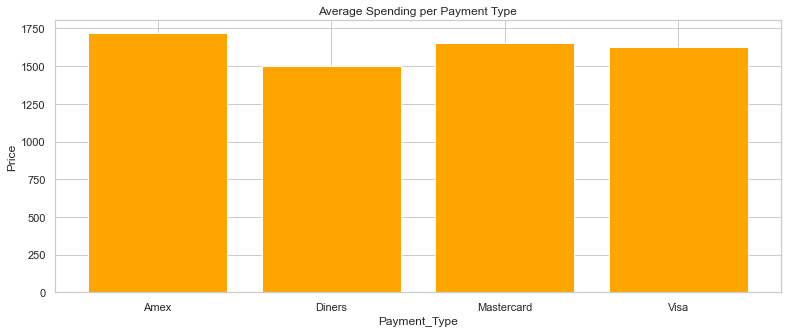

In [18]:
# The result shows a bar graph created using Matplotlib library.
# The bar graph tells the relationship between the the average spending (price) and payment type.


salesDF = pd.read_csv('DataLab/SalesJan2009.csv', sep=',')

paymentType = salesDF.groupby(['Payment_Type']).mean()
priceRate = paymentType['Price']
print(priceRate)

print('\n')

plt.figure(figsize=(13,5))
plt.bar(priceRate.index, priceRate.values, color='orange')
plt.title('Average Spending per Payment Type')
plt.xlabel('Payment_Type')
plt.ylabel('Price')
plt.show()




Question 8

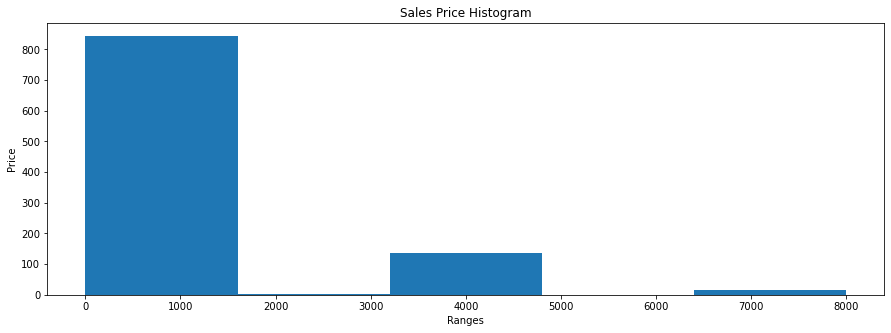

In [38]:
# The result is based on the SalesJan2009 csv file.
# The result shows a histogram of the Price with 5 bins. The histogram is ranged from 0 to 8000.

salesDF = pd.read_csv('DataLab/SalesJan2009.csv', sep=',')

plt.figure(figsize=(15,5))
plt.title('Sales Price Histogram')
plt.xlabel('Ranges')
plt.ylabel('Price')
plt.hist(salesDF['Price'], 5, range=(0, 8000))
plt.show()

Question 9

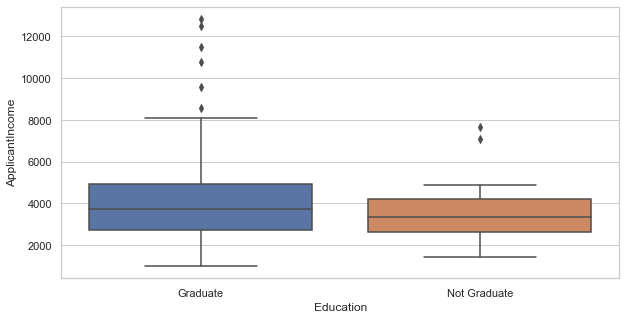

In [9]:
# The result is based on the Loan Data csv file. 
# The result shows a boxplot of Applicant Income from gaduates and non graduates.

loanDF = pd.read_csv('DataLab/LoanData.csv', sep=',')

plt.figure(figsize=(10, 5))
ax = sns.boxplot(loanDF.Education, loanDF.ApplicantIncome[0:100])